In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = 'data'
DATA_FILES = ['conditions', 'forms', 'horse_sexes', 'horses', 'markets', 'odds', 'riders', 'runners', 'weathers']

data = {}

for data_file in DATA_FILES:
    data[data_file] = pd.read_csv(f'%s/%s.csv' % (DATA_DIR, data_file))



Index(['id', 'collected_at', 'market_id', 'position', 'place_paid', 'margin',
       'horse_id', 'trainer_id', 'rider_id', 'handicap_weight', 'number',
       'barrier', 'blinkers', 'emergency', 'form_rating_one',
       'form_rating_two', 'form_rating_three', 'last_five_starts',
       'favourite_odds_win', 'favourite_odds_place', 'favourite_pool_win',
       'favourite_pool_place', 'tip_one_win', 'tip_one_place', 'tip_two_win',
       'tip_two_place', 'tip_three_win', 'tip_three_place', 'tip_four_win',
       'tip_four_place', 'tip_five_win', 'tip_five_place', 'tip_six_win',
       'tip_six_place', 'tip_seven_win', 'tip_seven_place', 'tip_eight_win',
       'tip_eight_place', 'tip_nine_win', 'tip_nine_place'],
      dtype='object')


/tmp/ipykernel_20439/1772334885.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if not math.isnan(runner['position']) and not math.isnan(age) and age is not None:
/tmp/ipykernel_20439/1772334885.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  age = int(age)
/tmp/ipykernel_20439/1772334885.py:22: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.array(wins_per_age) / np.array(total_ages))


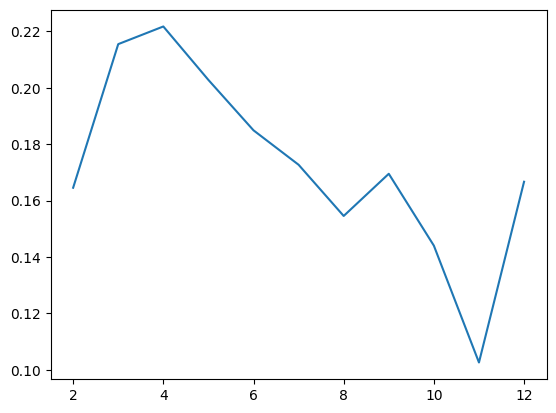

In [7]:
# print(data['runners'].columns)

# error on row 1705
# error on row 1707
# horse age vs place %
wins_per_age = [0] * 20
total_ages = [0] * 20
for index in range(len(data['runners'])):
    runner = data['runners'].iloc[index]
    try:
        age = data['horses'][data['horses']['id'] == runner['horse_id']]['age']
        if not math.isnan(runner['position']) and not math.isnan(age) and age is not None:
            age = int(age)
            total_ages[age] += 1
            if runner['position'] < 3:
                wins_per_age[age] += 1
    except:
        print(f'error on row %d' % index)

total_placements = sum(wins_per_age)
# plt.plot(np.array(wins_per_age) / total_placements)
plt.plot(np.array(wins_per_age) / np.array(total_ages))